In [2]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files 
import io
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

In [3]:
# 
data = pd.read_csv('fetal_health.csv')

In [4]:
#print(data.head(10))

data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [5]:

data.isna().sum()
#Check the total null values present in each of the columns in the data set

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
#shape of the data set(gives the number of rows and columns of the data set)
data.shape

(2126, 22)

There are no null values in this dataset.

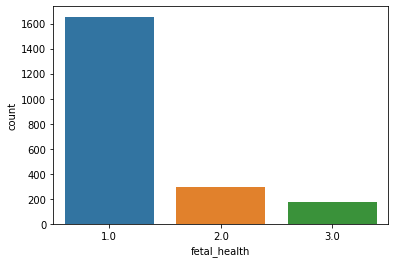

In [7]:

#
#Checking the distribution [Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)] of target label 'fetal_health' using a SNS Countplot
#

sns.countplot(x = 'fetal_health' ,data = data)

In [9]:
#Trying to balance the target variables using the Random Over Sampler method

rdm_smpler = RandomOverSampler()

X, Y = data.iloc[:,:-1], data['fetal_health']

X,Y = rdm_smpler.fit_resample(X,Y)

In [11]:
#Checking for the count of unique values present in the target.
Y.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [12]:
#Function to plot decision boundary
def plot_meshgrid(x, y, h=.02):
    x_minimum, x_maximum = x.min() - 1, x.max() + 1
    y_minimum, y_maximum = y.min() - 1, y.max() + 1
    res_x, res_y = np.meshgrid(np.arange(x_minimum, x_maximum, h), np.arange(y_minimum, y_maximum, h))
    return res_x, res_y

def contoursPlot(ax, clf, res_x, res_y, **params):
    Z = clf.predict(np.c_[res_x.ravel(), res_y.ravel()])
    Z = Z.reshape(res_x.shape)
    final_result = ax.contourf(res_x, res_y, Z, **params)
    return final_result

In [14]:


#PCA(dimentionality reduction)

var_pca= PCA(n_components=2) #we are giving the no_components=2

X = pd.DataFrame(var_pca.fit_transform(X))

Model Training with C=0.01

In [15]:
#Training model with C = 0.01

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()              #Normalise using MinMax Scalar
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mdl_c_01 = SVC(C = 0.01, kernel='linear')

mdl_c_01.fit(x_train, y_train)

y_pred_train1 = mdl_c_01.predict(x_train)
print('Accuarcy Score:(Train Data set)', accuracy_score(y_train,y_pred_train1))


y_pred_test1 = mdl_c_01.predict(x_test)
print('Accuracy Score(Test Data Set:', accuracy_score(y_test,y_pred_test1))


Accuarcy Score:(Train Data set) 0.5835850956696879
Accuracy Score(Test Data Set: 0.5931520644511581


No handles with labels found to put in legend.


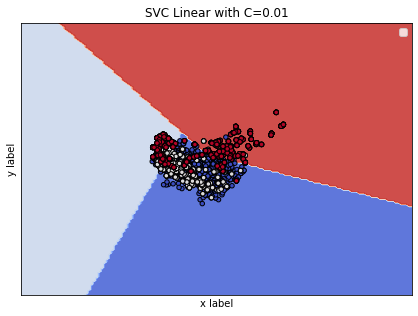

In [18]:
#Plotting diagrams for the C value =0.01

X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(7,5))
# title

title = ('SVC Linear with C=0.01')

# Grid for plotting
X0, X1 = X1[:, 0], X1[:, 1]
res_x, res_y = plot_meshgrid(X0, X1)

contoursPlot(ax, mdl_c_01, res_x, res_y, cmap=plt.cm.coolwarm, alpha=0.9)
#Contours Plot

ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Training model with C = 0.2

In [19]:
#Training model with C = 0.1

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mdl_svc_02 = SVC(C = 0.2, kernel='linear')

mdl_svc_02.fit(x_train, y_train)

y_pred_train3 = mdl_svc_02.predict(x_train)
print('Accuracy Score(Train Data set)', accuracy_score(y_train,y_pred_train3))


y_pred_test3 = mdl_svc_02.predict(x_test)
print('Accuracy Score (Test Data set)', accuracy_score(y_test,y_pred_test3))


Accuracy Score(Train Data set) 0.6676737160120846
Accuracy Score (Test Data set) 0.6364551863041289


No handles with labels found to put in legend.


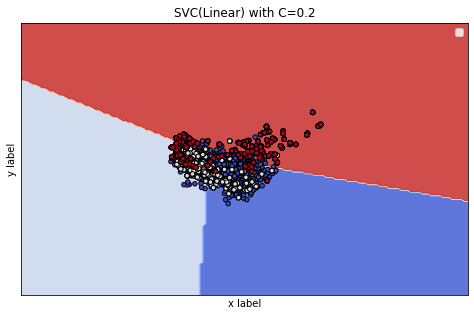

In [21]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(8,5))
# title 

title = ('SVC(Linear) with C=0.2')
#Grid Plot


X0, X1 = X1[:, 0], X1[:, 1]
res_x, res_y = plot_meshgrid(X0, X1)

contoursPlot(ax, mdl_svc_02, res_x, res_y, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Training model with C = 10

In [23]:
# SVC Model Training with C=10

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mdl_c_03 = SVC(C = 10, kernel='linear')

mdl_c_03.fit(x_train, y_train)

y_pred_train5 = mdl_c_03.predict(x_train)
print('Accuracy(Train Data Set:', accuracy_score(y_train,y_pred_train5))


y_pred_test5 = mdl_c_03.predict(x_test)
print('Accuracy Score(Test Data set)', accuracy_score(y_test,y_pred_test5))

Accuracy(Train Data Set: 0.6711983887210473
Accuracy Score(Test Data set) 0.6868076535750252


No handles with labels found to put in legend.


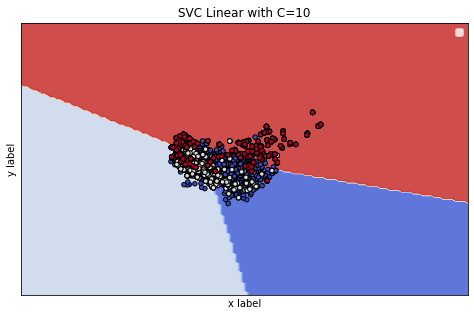

In [25]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(8,5))
# title
title = ('SVC Linear with C=10')



X0, X1 = X1[:, 0], X1[:, 1]
res_x, res_y = plot_meshgrid(X0, X1)

contoursPlot(ax, mdl_c_03, res_x, res_y, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Training model with C = 100

In [26]:
# SVC Training Model with C=100

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mdl_c_100 = SVC(C = 100, kernel='linear')

mdl_c_100.fit(x_train, y_train)

y_pred_train5 = mdl_c_100.predict(x_train)
print('Accuracy Score(Train Data set:)', accuracy_score(y_train,y_pred_train5))


y_pred_test5 = mdl_c_100.predict(x_test)
print('Accuracy Score(Test Data set:)', accuracy_score(y_test,y_pred_test5))

Accuracy Score(Train Data set:) 0.6717019133937563
Accuracy Score(Test Data set:) 0.6787512588116817


No handles with labels found to put in legend.


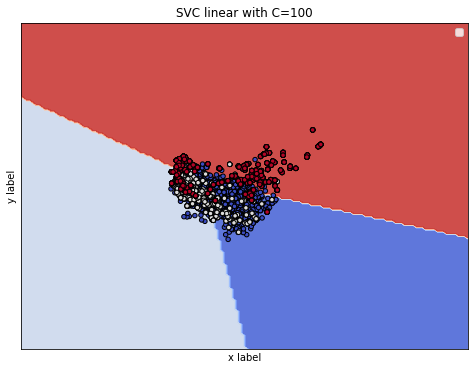

In [27]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(8,6))
# title
title = ('SVC linear with C=100')


X0, X1 = X1[:, 0], X1[:, 1]
res_x, res_y = plot_meshgrid(X0, X1)

contoursPlot(ax, mdl_c_100, res_x, res_y, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

##Model Training with C=500

In [28]:
# Model Training with C=500

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


mdl_C_500 = SVC(C = 500, kernel='linear')

mdl_C_500.fit(x_train, y_train)

y_pred_t = mdl_C_500.predict(x_train)
print('Accuracy Score(Train Data:)', accuracy_score(y_train,y_pred_t))


y_pred_t =mdl_C_500.predict(x_test)
print('Accuracy Score(Test Data:)', accuracy_score(y_test,y_pred_t))

Accuracy Score(Train Data:) 0.676233635448137
Accuracy Score(Test Data:) 0.6706948640483383


No handles with labels found to put in legend.


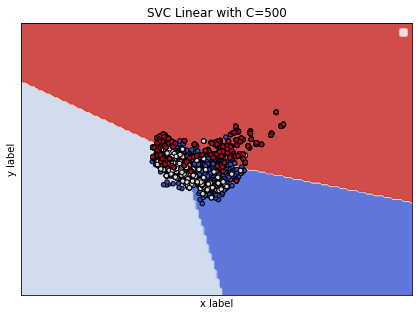

In [29]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(7,5))
# title
title = ('SVC Linear with C=500')
# Set-up grid for plotting.
X0, X1 = X1[:, 0], X1[:, 1]
res_x, res_y = plot_meshgrid(X0, X1)

contoursPlot(ax, mdl_C_500, res_x,res_y, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()